# Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
movie=pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/9.Association Rules/my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


**Here the first 5 columns have an list of movies which are already in numerical data in the other columns so we drop these columns.**

In [4]:
movie=movie.iloc[:,5:]
movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
#Highest grossing movie
gross=pd.DataFrame(movie.sum()).sort_values(0,ascending=False)
gross

,0
Gladiator,7
Sixth Sense,6
Patriot,6
LOTR1,2
Harry Potter1,2
LOTR2,2
Green Mile,2
Harry Potter2,1
LOTR,1
Braveheart,1


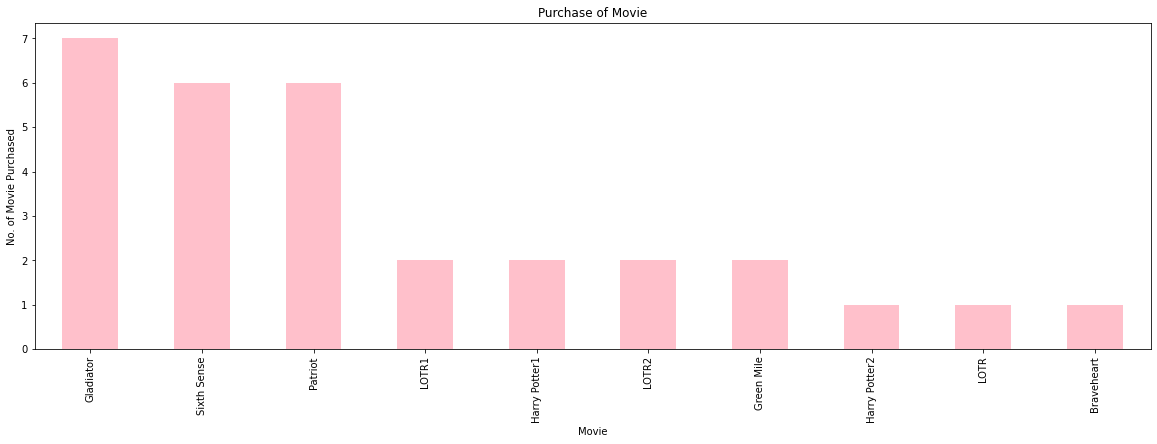

In [6]:
#bar plot of no. movies watched/purchased
fig,ax = plt.subplots(figsize=(20,6))
gross.plot(kind="bar",color="pink",legend=False,ax=ax)
plt.xlabel("Movie")
plt.ylabel("No. of Movie Purchased")
plt.title("Purchase of Movie")
plt.show();

## Apriori Algorithm
**Support - 0.1 & Lift - 1.2**

In [7]:
#Apriori Algorithm
apri1= apriori(movie, min_support=0.1,use_colnames=True,max_len=3)
apri1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
# adding lift criteria
rule1 = association_rules(apri1, metric="lift")
rule1.sort_values("lift",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
112,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
36,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
37,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


In [9]:
print("No. of rules below 1 lift value are",rule1[rule1.lift<1]["lift"].count())
rule1[rule1.lift<1]

No. of rules below 1 lift value are 8


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
8,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
9,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
60,"(LOTR2, LOTR1)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
65,(Sixth Sense),"(LOTR2, LOTR1)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96


**It has been seen above that most of the rules have lift value above 1 expect few.**

In [10]:
# adding lift criteria
rule1 = association_rules(apri1, metric="lift",min_threshold=1.2)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
1,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
...,...,...,...,...,...,...,...,...,...
111,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
112,"(LOTR2, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113,(Green Mile),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
114,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


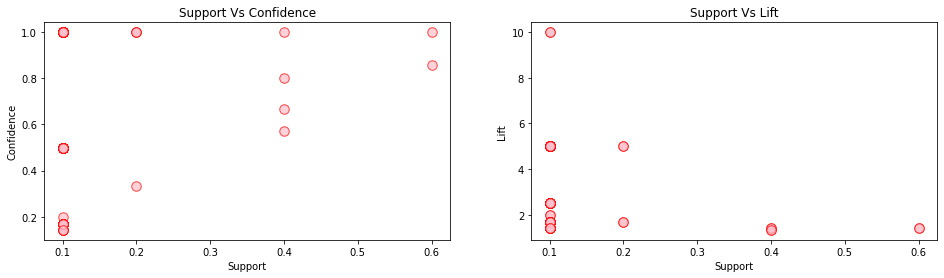

In [11]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule1["support"],rule1["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule1["support"],rule1["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

**The rules have no trend they are scattered all round.                                            
Support - 0.1 & Lift - 1.5**

In [12]:
#Apriori Algorithm
apri2= apriori(movie, min_support=0.1,use_colnames=True,max_len=3)
apri2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [13]:
# adding lift criteria
rule2 = association_rules(apri2, metric="lift")
rule2.sort_values("lift",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
112,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
36,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
37,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


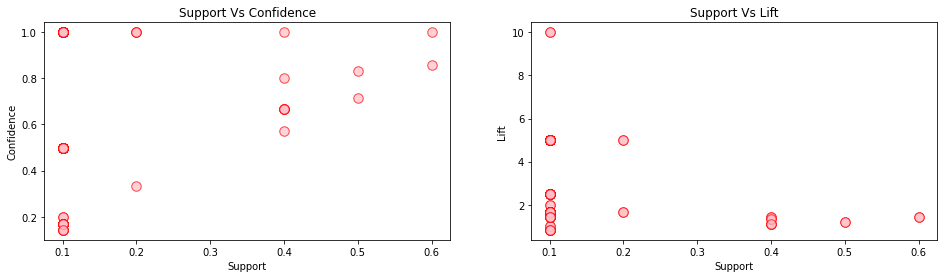

In [14]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule2["support"],rule2["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule2["support"],rule2["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

**Support - 0.11 & Lift - 1**

In [15]:
#Apriori Algorithm
apri3= apriori(movie, min_support=0.11,use_colnames=True)
apri3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [16]:
# adding lift criteria
rule3 = association_rules(apri3, metric="lift",min_threshold=1)
rule3.sort_values("lift",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


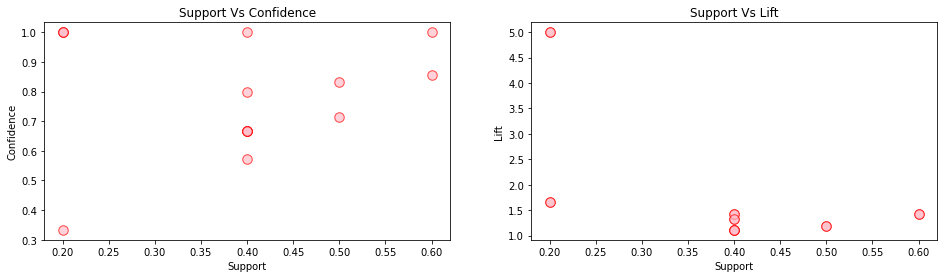

In [17]:
# visualization of obtained rule
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)  
plt.scatter(rule3["support"],rule3["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support Vs Confidence")

plt.subplot(1,2,2)
plt.scatter(rule3["support"],rule3["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("Support Vs Lift")

plt.show();

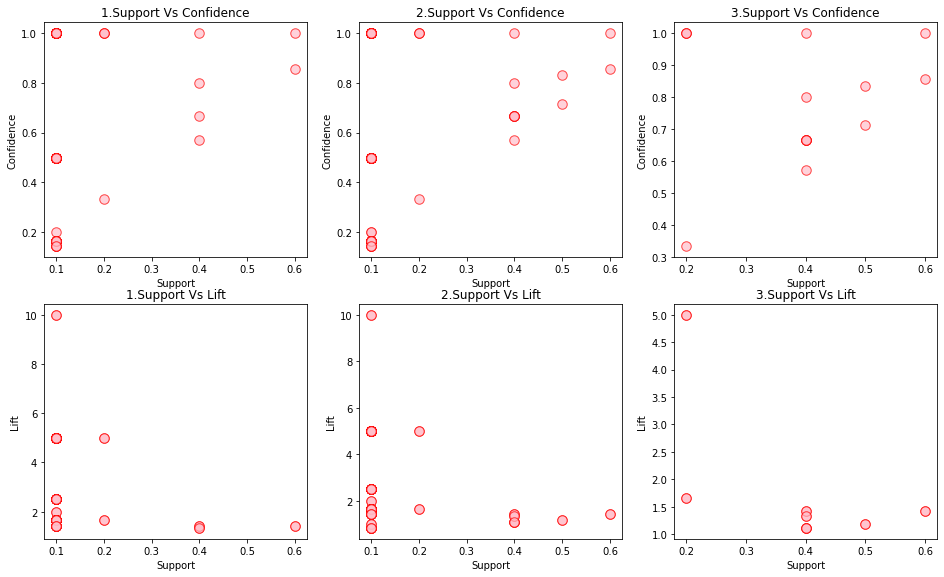

In [18]:
#all visuals at a look
fig = plt.figure(figsize=(16,9.5))

plt.subplot(2,3,1)
plt.scatter(rule1["support"],rule1["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("1.Support Vs Confidence")

plt.subplot(2,3,2)
plt.scatter(rule2["support"],rule2["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("2.Support Vs Confidence")

plt.subplot(2,3,3)
plt.scatter(rule3["support"],rule3["confidence"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Confidence")   
plt.title("3.Support Vs Confidence")

plt.subplot(2,3,4)
plt.scatter(rule1["support"],rule1["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("1.Support Vs Lift")

plt.subplot(2,3,5)
plt.scatter(rule2["support"],rule2["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("2.Support Vs Lift")

plt.subplot(2,3,6)
plt.scatter(rule3["support"],rule3["lift"],s=90,color="pink",edgecolors="r",alpha=0.7)
plt.xlabel("Support")  
plt.ylabel("Lift")   
plt.title("3.Support Vs Lift");

In [19]:
data = [[0.1,1.2],[0.1,1.5],[0.11,1]]
df = pd.DataFrame(data, columns=["Support", "Lift"])
df["Apriori"]=[len(apri1),len(apri2),len(apri3)]
df["Association_rules"]=[len(rule1),len(rule2),len(rule3)]
df

,Support,Lift,Apriori,Association_rules
0,0.10,1.2,46,116
1,0.10,1.5,46,132
2,0.11,1.0,13,16


**It is clearly visible that an increase in Support value results into less number of rules & increase in Lift value gives less and more accurate Association Rule.**